In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import validation_curve
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
data=pd.read_csv('creditcard.csv')

In [2]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
#selection de données
x=data.drop('Class',axis=1)
y=data['Class']

In [27]:
#diviser les données en train et test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
listeModel=['Logis','KNN','Tree','Forest']
listef1_score=[]

Regression Logistique

In [5]:
model=LogisticRegression()
model.fit(x_train,y_train)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [6]:
model.score(x_test,y_test)

0.998718443874864

In [7]:
y_pred=model.predict(x_test)

In [8]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.64      0.57      0.61        98

    accuracy                           1.00     56962
   macro avg       0.82      0.79      0.80     56962
weighted avg       1.00      1.00      1.00     56962



In [9]:
scoreL=cross_val_score(model,x_train,y_train,cv=5,scoring='f1')

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [28]:
scoreL.mean()
listef1_score.append(scoreL.mean())

Kneighbors

In [11]:
model2=KNeighborsClassifier()
model2.fit(x_train,y_train)

KNeighborsClassifier()

In [13]:
model2.score(x_test,y_test)

0.9983673326077034

In [12]:
ypred=model2.predict(x_test)

In [14]:
scoreKNN=cross_val_score(model2,x_train,y_train,cv=5,scoring='f1').mean()
print(scoreKNN)

0.08583713227313153


In [29]:
listef1_score.append(scoreKNN)

In [16]:
print(confusion_matrix(y_test,ypred))
print(classification_report(y_test,ypred))

[[56864     0]
 [   93     5]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       1.00      0.05      0.10        98

    accuracy                           1.00     56962
   macro avg       1.00      0.53      0.55     56962
weighted avg       1.00      1.00      1.00     56962



Tree Decision

In [17]:
from sklearn import tree  
model3=tree.DecisionTreeClassifier()

In [18]:
model3.fit(x_train,y_train)

DecisionTreeClassifier()

In [19]:
model3.score(x_test,y_test)

0.9990695551420246

In [20]:
Ypred=model.predict(x_test)

In [21]:
print(confusion_matrix(y_test,model.predict(x_test)))
print(classification_report(y_test,model.predict(x_test)))

[[56833    31]
 [   42    56]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.64      0.57      0.61        98

    accuracy                           1.00     56962
   macro avg       0.82      0.79      0.80     56962
weighted avg       1.00      1.00      1.00     56962



In [26]:
scoreTree=cross_val_score(model3,x_train,y_train,cv=5,scoring='f1')

In [30]:
scoreTree.mean()
listef1_score.append(scoreTree.mean())

In [31]:
print(listef1_score)

[0.708081156491075, 0.08583713227313153, 0.7507187387820945]


Random Forest

In [32]:
model4=RandomForestClassifier()
model4.fit(x_train,y_train)

RandomForestClassifier()

In [33]:
pred=model4.predict(x_test)

In [34]:
scoreForest=cross_val_score(model4,x_train,y_train,cv=5,scoring='f1')

In [35]:
listef1_score.append(scoreForest.mean())

In [36]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test,pred))

[[56860     4]
 [   22    76]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.95      0.78      0.85        98

    accuracy                           1.00     56962
   macro avg       0.97      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962



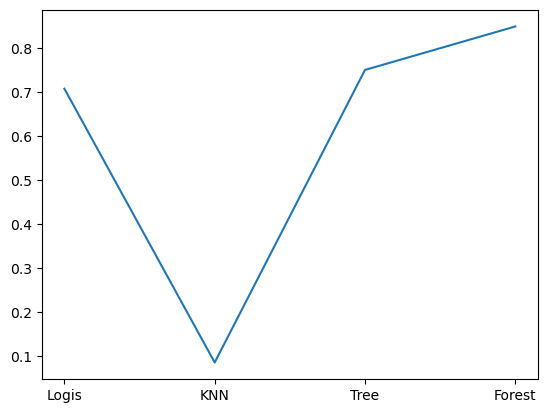

In [37]:
plt.plot(listeModel,listef1_score)

On remarque sur le graphique que le RandomForest a plus de score que les autres méthodes donc le mieux adapté à notre modèle

In [ ]:
def fraude(model,x): #fonction de prediction
    return model.predict(x)
fraude(model4,x)